# Use case: predict best price for VW Passat B6 TDI basing on real offers

### Settings

In [1]:
percent_of_test_data = 33
main_url = 'https://www.otomoto.pl/osobowe/volkswagen/passat/b6-2005-2010/?search%5Bfilter_float_price%3Afrom%5D=5000&search%5Bfilter_float_price%3Ato%5D=50000&search%5Bfilter_float_year%3Afrom%5D=2005&search%5Bfilter_float_year%3Ato%5D=2010&search%5Bfilter_enum_fuel_type%5D%5B0%5D=diesel&search%5Bfilter_enum_damaged%5D=0&search%5Bfilter_enum_rhd%5D=0&search%5Border%5D=created_at%3Adesc&search%5Bcountry%5D='

### Prepare environment

In [2]:
import sys
sys.path.append('/Users/tomek/OneDrive/Projects/Machine Learning/car-price-prediction')

import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import car_price_prediction

%matplotlib inline
plt.rcParams['figure.figsize'] = 16,5

### Count pages with offers

In [3]:
pages = car_price_prediction.count_pages(main_url)
print("Found %d pages" % pages)

Found 41 pages


### Collect samples from those offers

In [4]:
Xy = car_price_prediction.collect_data(main_url,pages)

print("Collected %d samples" % len(Xy))
#print(Xy.shape)


	Parsing page: 41

Collected 1139 samples


In [5]:
print("\nLast 10 samples:")
print("[year, mileage, capacity, price]")
np.set_printoptions(precision=0)
print(Xy[-10:])


Last 10 samples:
[year, mileage, capacity, price]
[[   2007.  270000.    2000.   13900.]
 [   2008.  340000.    1968.   28900.]
 [   2005.  169106.    1968.   25300.]
 [   2007.  408000.    1998.   12200.]
 [   2006.  239300.    2000.   29700.]
 [   2008.  236000.    1968.   26900.]
 [   2007.  329500.    2000.   21500.]
 [   2008.  266000.    1968.   25900.]
 [   2006.  232922.    2000.   19900.]
 [   2008.  167000.    2000.   29900.]]


## Let's have some fun with that data

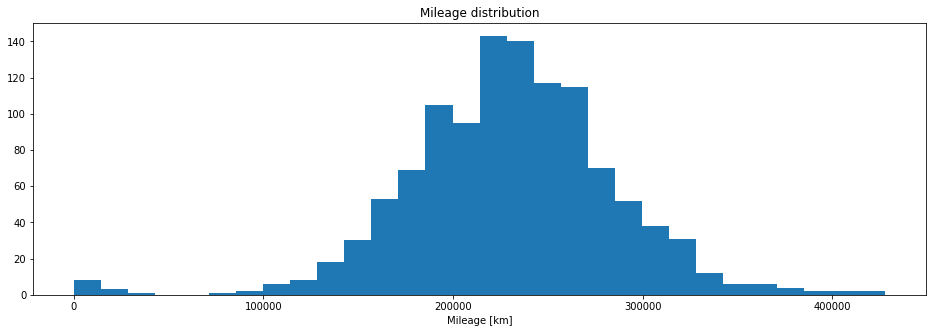

In [6]:
plt.figure()
plt.hist(Xy[:,1],30)
plt.title("Mileage distribution")
plt.xlabel("Mileage [km]")
plt.show()

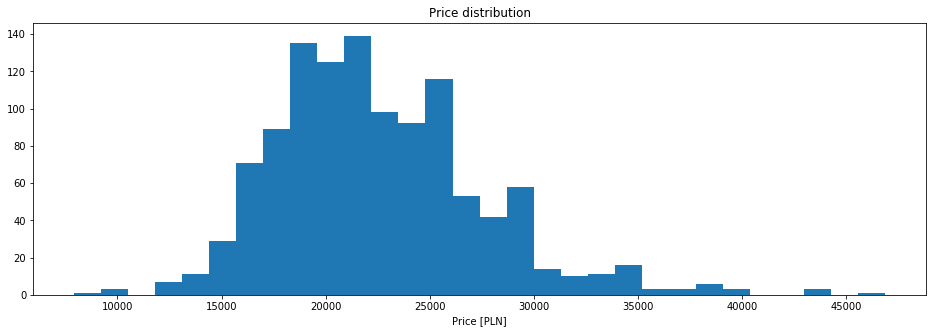

In [7]:
plt.figure()
plt.hist(Xy[:,3],30)
plt.title("Price distribution")
plt.xlabel("Price [PLN]")
plt.show()

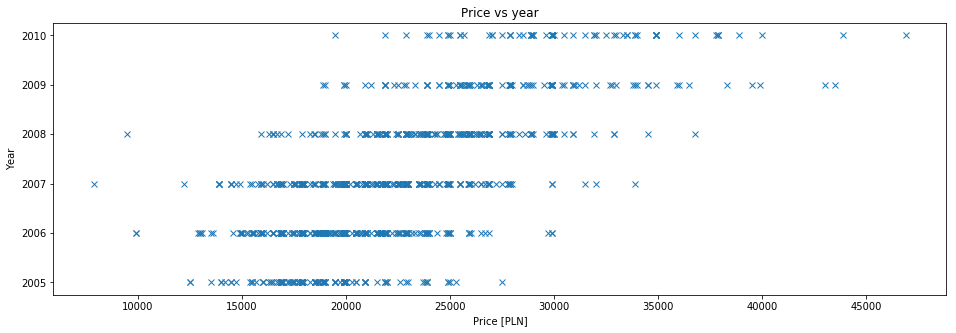

In [8]:
plt.figure()
plt.title("Price vs year")
plt.xlabel("Price [PLN]")
plt.ylabel("Year")
plt.plot(Xy[:,3],Xy[:,0],"x")
plt.show()

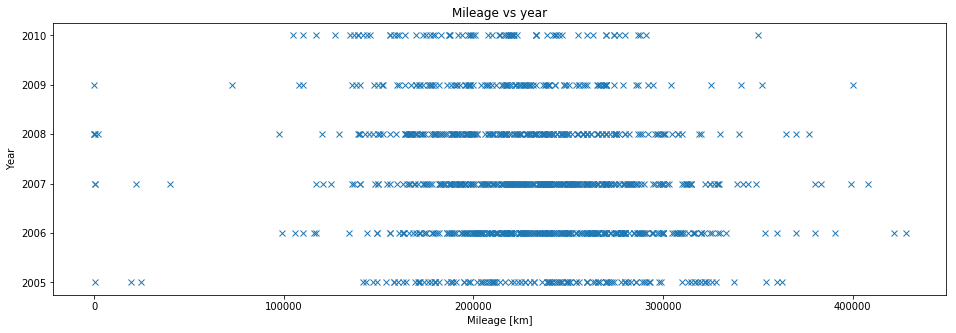

In [9]:
plt.figure()
plt.title("Mileage vs year")
plt.xlabel("Mileage [km]")
plt.ylabel("Year")
plt.plot(Xy[:,1],Xy[:,0],"x")
plt.show()


### Divide samples to train and test

In [10]:
X_train, y_train, X_test, y_test = car_price_prediction.split_data(Xy, percent_of_test_data) 

print('Training samples: %d' % len(X_train))
print('Test samples: %d' % len(X_test))


Training samples: 763
Test samples: 376


### Let's train!

In [11]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)

np.set_printoptions(formatter={'float_kind': '{:f}'.format})
print('Interceptor: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Interceptor:  [-4672707.489920]
Coefficients:  [[2341.782905 -0.021402 -0.012689]]


@see my [Desmos calculator](https://www.desmos.com/calculator/rr4aec66bf)

### Let's test

In [12]:
y_pred = regr.predict(X_test)

#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Variance score: 0.52


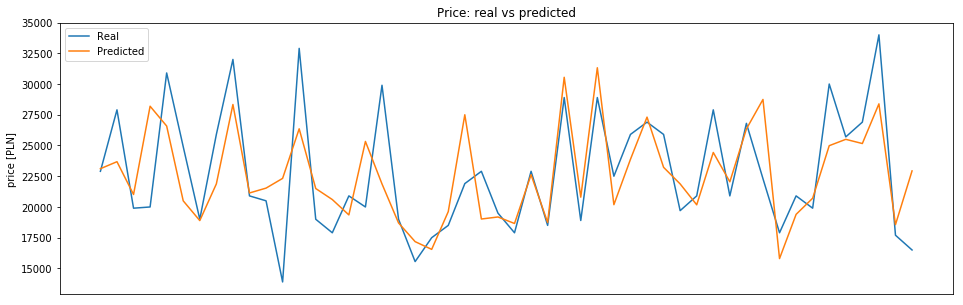

In [18]:
plt.figure()
plt.plot(y_test[-50:], label="Real")
plt.plot(y_pred[-50:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price [PLN]")
plt.xticks(())
plt.show()


## What is the best price for... 

### Passat B6 1.9 TDI 2009 with 188 000 mileage

> - 1.6 = 1598
> - 1.9 = 1896
> - 2.0 = 1968

In [14]:
price_pred = regr.predict([[2009,180000, 1896]])
print('The best price for VW Passat B6 1.9 TDI 2009 with 188 000 mileage is %.2f PLN' % price_pred[0][0])

The best price for VW Passat B6 1.9 TDI 2009 with 188 000 mileage is 28057.90 PLN


### Passat B6 2.0 TDI 2006 with 288 000 mileage

In [15]:
price_pred = regr.predict([[2006,288000, 1968]])
print('The best price for VW Passat B6 2.0 TDI 2006 with 288 000 mileage is  %.2f PLN' % price_pred[0][0])

The best price for VW Passat B6 2.0 TDI 2006 with 288 000 mileage is  18720.20 PLN
